In [13]:
# Import necessary libraries
%matplotlib widget
import matplotlib.pyplot as plt
import numpy as np
from tvb.simulator.lab import *

In [14]:

# Load the default connectivity data
conn = connectivity.Connectivity.from_file()

# Configure the spatial pattern of the stimulus
weighting = np.zeros((76, ))  # Assuming 76 regions
# Choose some nodes to stimulate arbitrarily
weighting[[14, 52, 11, 49]] = 0.1

2024-08-13 16:01:26,683 - WARNING - tvb.basic.readers - File 'hemispheres' not found in ZIP.


In [15]:

# Define a function to create and run the simulation with varying stimulus intervals
def run_simulation(stimulus_onset, stimulus_interval):
    # Temporal profile: Pulse Train
    eqn_t = equations.PulseTrain()
    eqn_t.parameters['onset'] = stimulus_onset ## when it starts
    eqn_t.parameters['T'] = stimulus_interval ## the interval between each pulse
    eqn_t.parameters['tau'] = 50.0 ## the width of the pulse

    # Combine spatial and temporal components into a StimuliRegion object
    stimulus = patterns.StimuliRegion(
        temporal=eqn_t, 
        connectivity=conn,
        weight=weighting)

    # Configure the stimulus
    stimulus.configure_space()
    stimulus.configure_time(np.arange(0., 3e3, 2**-4))

    # Set up the simulation
    sim = simulator.Simulator(
        model=models.Generic2dOscillator(a=np.array([0.3]), tau=np.array([2])),
        connectivity=conn,
        coupling=coupling.Difference(a=np.array([7e-4])),
        integrator=integrators.HeunStochastic(dt=0.5, noise=noise.Additive(nsig=np.array([5e-5]))),
        monitors=(monitors.TemporalAverage(period=1.0),),
        stimulus=stimulus,
        simulation_length=5e3  # 5 seconds for each simulation
    ).configure()

    # Run the simulation
    (tavg_time, tavg_data),  = sim.run()

    # Visualize the results
    plt.figure()
    plt.plot(tavg_time, tavg_data[:, 0, :, 0], 'k', alpha=0.1)
    plt.plot(tavg_time, tavg_data[:, 0, :, 0].mean(axis=1), 'r', alpha=1)
    plt.title(f"Temporal average with interval {stimulus_interval} ms")
    plt.ylabel("Temporal average")
    plt.xlabel('Time (ms)')
    plt.show()

    return tavg_time, tavg_data

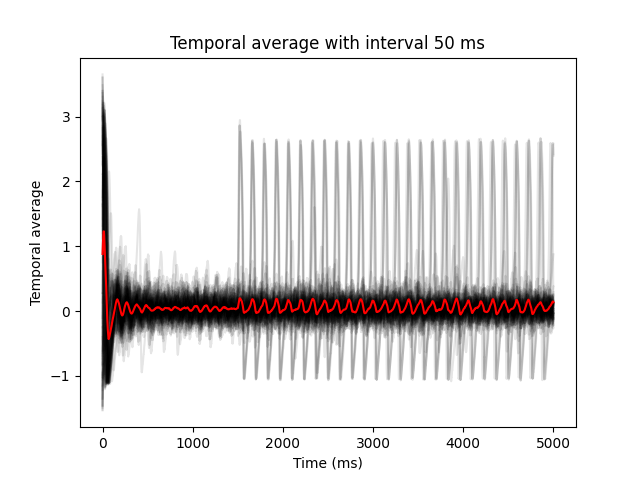

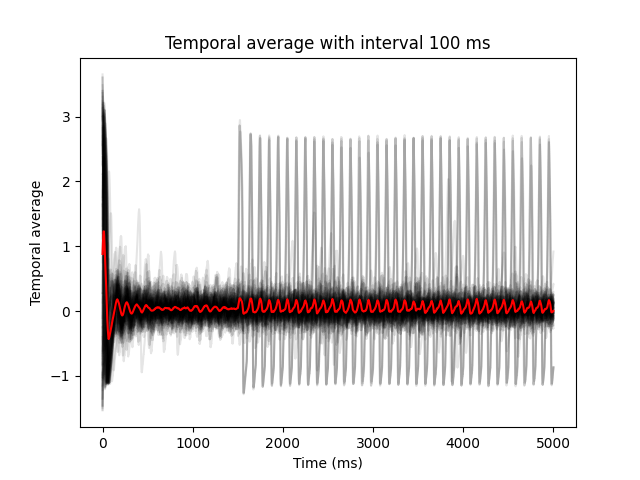

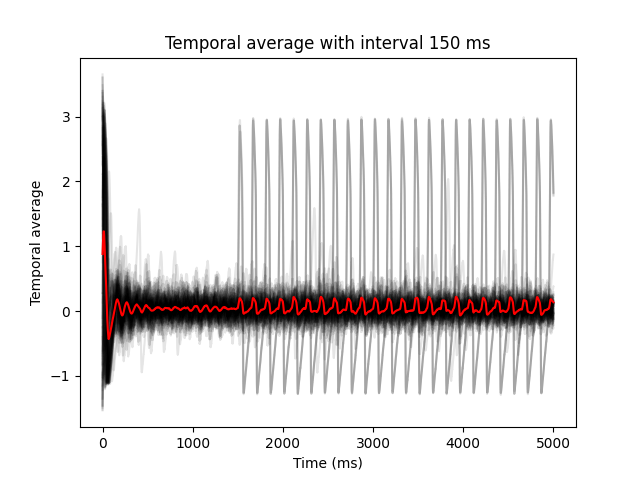

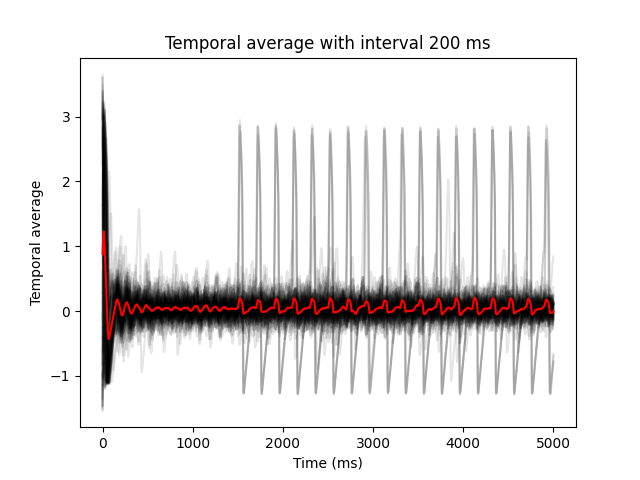

In [16]:
# Set up different time intervals for the stimulus
stimulus_intervals = [50, 100, 150, 200] # in ms

# Run simulations for each stimulus interval
results = []
for interval in stimulus_intervals:
    tavg_time, tavg_data = run_simulation(stimulus_onset=1.5e3, stimulus_interval=interval)
    results.append((tavg_time, tavg_data))

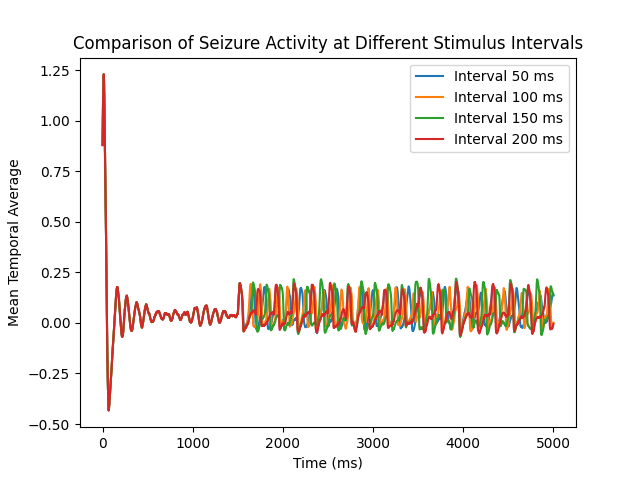

In [17]:
# Analyze results 
plt.figure()
for i, (tavg_time, tavg_data) in enumerate(results):
    plt.plot(tavg_time, tavg_data[:, 0, :, 0].mean(axis=1), label=f'Interval {stimulus_intervals[i]} ms')
plt.legend()
plt.title('Comparison of Seizure Activity at Different Stimulus Intervals')
plt.ylabel("Mean Temporal Average")
plt.xlabel('Time (ms)')
plt.show()


In [18]:
def run_simulation(stimulus_onset, stimulus_interval):
    # Temporal profile: Pulse Train
    eqn_t = equations.PulseTrain()
    eqn_t.parameters['onset'] = stimulus_onset
    eqn_t.parameters['T'] = stimulus_interval
    eqn_t.parameters['tau'] = 50.0

    # Combine spatial and temporal components into a StimuliRegion object
    stimulus = patterns.StimuliRegion(
        temporal=eqn_t,
        connectivity=conn,
        weight=weighting)

    # Configure the stimulus
    stimulus.configure_space()
    stimulus.configure_time(np.arange(0., 3e3, 2**-4))

    # Set up the simulation
    sim = simulator.Simulator(
        model=models.Generic2dOscillator(a=np.array([0.3]), tau=np.array([2])),
        connectivity=conn,
        coupling=coupling.Difference(a=np.array([7e-4])),
        integrator=integrators.HeunStochastic(dt=0.5, noise=noise.Additive(nsig=np.array([5e-5]))),
        monitors=(monitors.TemporalAverage(period=1.0),),
        stimulus=stimulus,
        simulation_length=5e3  # 5 seconds for each simulation
    ).configure()

    # Run the simulation
    (tavg_time, tavg_data),  = sim.run()

    # Visualize the results
    plt.figure()
    plt.plot(tavg_time, tavg_data[:, 0, :, 0], 'k', alpha=0.1)
    plt.plot(tavg_time, tavg_data[:, 0, :, 0].mean(axis=1), 'r', alpha=1)
    plt.title(f"Temporal average with onset {stimulus_onset} ms")
    plt.ylabel("Temporal average")
    plt.xlabel('Time (ms)')
    plt.show()

    return tavg_time, tavg_data

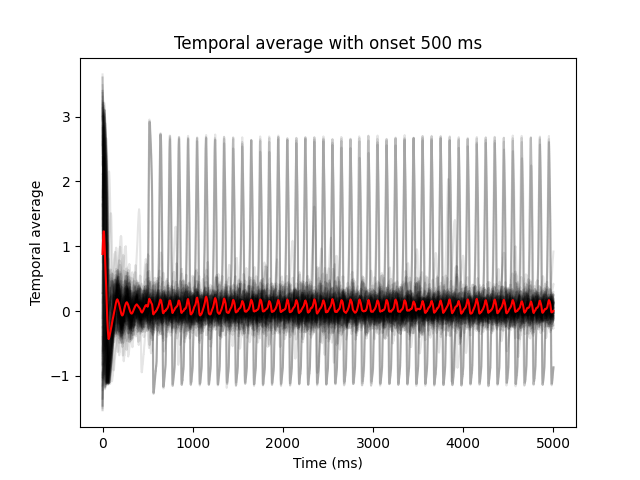

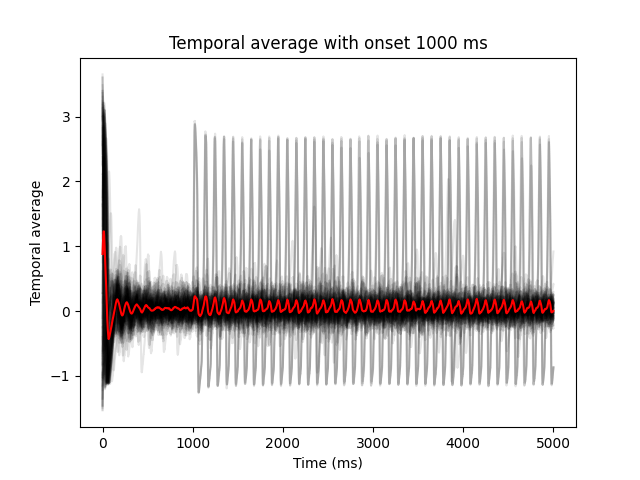

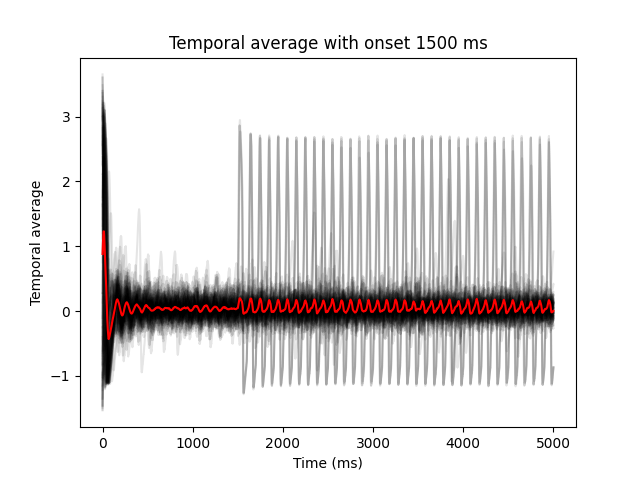

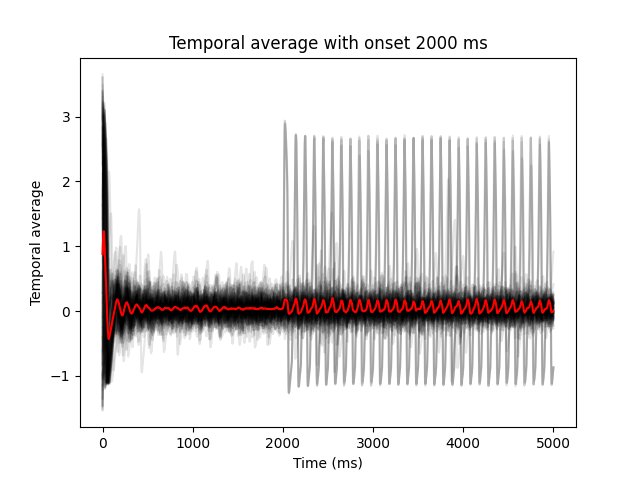

In [19]:
# Set up different onset times for the stimulus
stimulus_onsets = [500, 1000, 1500, 2000]  # in ms

# Run simulations for each stimulus onset
results = []
for onset in stimulus_onsets:
    tavg_time, tavg_data = run_simulation(stimulus_onset=onset, stimulus_interval=100)
    results.append((tavg_time, tavg_data))


/var/folders/v7/dbllwbmn3qv0sk0spbzgpd440000gn/T/ipykernel_4327/3696040338.py:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`). Consider using `matplotlib.pyplot.close()`.
  plt.figure()


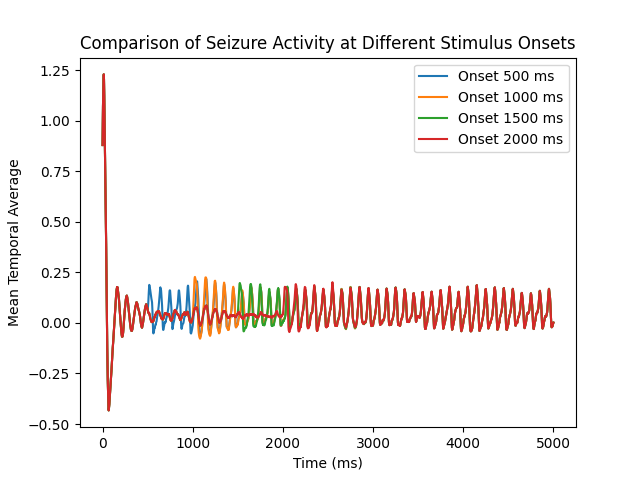

In [20]:
# Analyze results for different stimulus onsets
plt.figure()
for i, (tavg_time, tavg_data) in enumerate(results):
    plt.plot(tavg_time, tavg_data[:, 0, :, 0].mean(axis=1), label=f'Onset {stimulus_onsets[i]} ms')
plt.legend()
plt.title('Comparison of Seizure Activity at Different Stimulus Onsets')
plt.ylabel("Mean Temporal Average")
plt.xlabel('Time (ms)')
plt.show()
